<a href="https://colab.research.google.com/github/hadaseshel/CNN/blob/main/CNN64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Bio-intelligent Algorithms</></center></h1>
<h3><center>Exercise 2</center></h3>

The implementation of the exercise consists of several parts:
1. Getting data (train, validation, test and the trained model) from google drive.
2. The realization of the cnn model, and the training of the model in the main function.
3. Calculation of the accuracy percentage of validation.
4. The model prediction for the test set.
5. Converting data from csv files to pickle.

#1.Getting data from google drive.
In this part we get the data: train, validation and test from the google drive.<br>
We converted the data into pickle files and used them.<br>
In addition, we get the model we have already trained and saved: cnn643.h5.

In [ ]:
!gdown --id 1dpcyX8A4qNVvvtSvFrjg4PF9TvLp0iCe
!gdown --id 1CG3hKEbt7sX6D7Zn8cwb9OJ-Ij8u-qL4
!gdown --id 1Wcpf-ZPzqtccTp2Ry_6TWcRydth4n8l5
!gdown --id 1IT7zh9BBk-UMWE0PQlYyg_jlbhdmatco
!gdown --id 1HCKJeZu54oI259gtdagolIKxS2VqdH60
import numpy as np
np.random.seed(42)

import pickle
import torch
# Define the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def read_train_from_pickle(file_name="./train.pickle"):
    with open(file_name, 'rb') as handle:
        (x, y) = pickle.load(handle)
    return x, y
def read_validation_from_pickle(file_name="./validation.pickle"):
    with open(file_name, 'rb') as handle:
        (x, y) = pickle.load(handle)
    return x, y

def read_test_from_pickle(file_name="./test.pickle"):
    with open(file_name, 'rb') as handle:
        x = pickle.load(handle)
    return x
X_train,y_train = read_train_from_pickle()
X_validation,y_validation = read_validation_from_pickle()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dpcyX8A4qNVvvtSvFrjg4PF9TvLp0iCe
To: /content/validation.pickle
100% 24.6M/24.6M [00:00<00:00, 56.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CG3hKEbt7sX6D7Zn8cwb9OJ-Ij8u-qL4
To: /content/train.pickle
100% 197M/197M [00:07<00:00, 27.2MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.c

# 2.CNN

GPU is available
Epoch 1/50
500/500 [==============================] - 14s 20ms/step - loss: 2.0793 - accuracy: 0.2856 - val_loss: 2.0012 - val_accuracy: 0.2890 - lr: 0.0010
Epoch 2/50
500/500 [==============================] - 9s 19ms/step - loss: 1.7044 - accuracy: 0.3834 - val_loss: 2.1252 - val_accuracy: 0.3210 - lr: 0.0010
Epoch 3/50
500/500 [==============================] - 10s 19ms/step - loss: 1.5705 - accuracy: 0.4318 - val_loss: 1.6352 - val_accuracy: 0.4490 - lr: 0.0010
Epoch 4/50
500/500 [==============================] - 9s 19ms/step - loss: 1.4839 - accuracy: 0.4637 - val_loss: 1.4632 - val_accuracy: 0.5020 - lr: 0.0010
Epoch 5/50
500/500 [==============================] - 9s 18ms/step - loss: 1.4126 - accuracy: 0.4936 - val_loss: 1.3436 - val_accuracy: 0.5410 - lr: 0.0010
Epoch 6/50
500/500 [==============================] - 10s 19ms/step - loss: 1.3320 - accuracy: 0.5229 - val_loss: 1.3426 - val_accuracy: 0.5430 - lr: 0.0010
Epoch 7/50
500/500 [========================

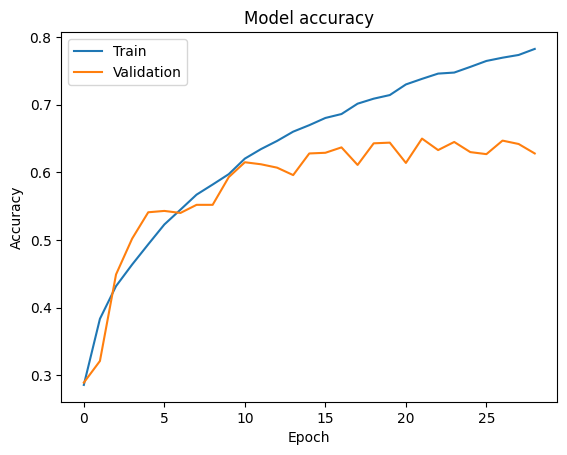

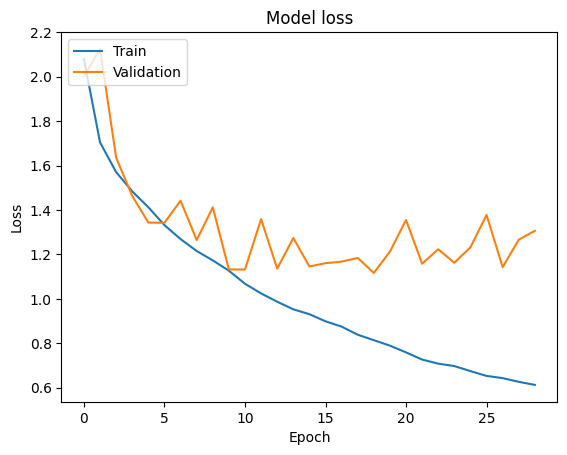

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Check if GPU is available and if not, exit.
if not tf.config.list_physical_devices('GPU'):
    raise SystemExit('GPU device not found. Please install GPU and try again.')
print('GPU is available')

# Assuming your datasets are loaded as X_train, y_train, X_validation, y_validation

# Learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.001  # Initial learning rate
    decay_factor = 0.9  # Factor to decrease the learning rate
    decay_epochs = 10   # Number of epochs after which to decay the learning rate

    if epoch < decay_epochs:
        return initial_lr
    else:
        return initial_lr * decay_factor ** (epoch // decay_epochs)

# Build a more complex CNN model
model = tf.keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment and add to the original dataset
X_train_reshaped = X_train.reshape(-1, 32, 32, 3)
X_validation_reshaped = X_validation.reshape(-1, 32, 32, 3)

augmented_X_train = []
augmented_y_train = []

# Augment each image 2 times, you can increase this factor if needed
for i in range(len(X_train_reshaped)):
    augmented_X_train.append(X_train_reshaped[i])
    augmented_y_train.append(y_train[i])
    for _ in range(3):  # adjust this to generate more augmented images per original image
        augmented_image, label = datagen.flow(np.expand_dims(X_train_reshaped[i], axis=0), np.expand_dims(y_train[i], axis=0)).next()
        augmented_X_train.append(augmented_image[0])
        augmented_y_train.append(label[0])

augmented_X_train = np.array(augmented_X_train)
augmented_y_train = np.array(augmented_y_train)


# Training the model with augmented data
batch_size = 64  # Increased batch size for better GPU utilization

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(augmented_X_train, augmented_y_train,
                    validation_data=(X_validation_reshaped, y_validation),
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    callbacks=[early_stop,lr_scheduler])


# Monitor training and validation progress

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Save the model

In [ ]:
# Save the model using TensorFlow's model.save() function
model.save('cnn643.h5')

# 3.Calculation of the accuracy percentage of validation.
By running this cell you can view the percent accuracy of the model you trained on validation.

In [ ]:
import numpy as np
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('cnn643.h5')

X_validation_reshaped = X_validation.reshape(-1, 32, 32, 3)

# Evaluate the model on the validation set
validation_loss, validation_accuracy = loaded_model.evaluate(X_validation_reshaped, y_validation, verbose=0)

print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.6430


# 4.The model prediction for the test set.
If you would like only to infer on our weights run the following cell - after getting the data from the first cell (In section 1).

In [ ]:
import numpy as np
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('cnn643.h5')

X_test = read_test_from_pickle()
X_test_reshaped = X_test.reshape(-1, 32, 32, 3)

# Run the model on the test set
test_outputs = loaded_model.predict(X_test_reshaped)

# Process the test outputs
results = [np.argmax(x, axis=0) + 1 for x in test_outputs]

# Create the output string
output = '\n'.join(str(x) for x in results)

# Print the output
print(output)

# Write the output to a file
with open('output.txt', 'w') as f:
    f.write(output)

32/32 [==============================] - 0s 3ms/step
7
3
2
6
3
6
7
2
7
1
3
1
6
7
5
1
9
1
2
7
9
6
6
6
4
4
8
1
1
4
1
5
3
5
10
9
9
10
7
1
7
1
4
4
3
8
10
7
6
4
10
9
1
10
2
4
6
1
10
5
4
7
8
6
8
1
1
1
4
9
3
6
10
10
8
9
10
7
10
2
6
7
1
6
1
6
10
7
7
4
9
3
7
6
1
2
4
9
5
3
7
3
9
1
6
6
1
7
7
7
4
10
5
6
10
1
7
4
5
8
10
8
10
9
9
2
4
1
7
2
6
9
2
2
8
7
7
3
7
7
6
9
5
2
2
5
7
10
7
9
4
4
9
1
6
6
4
7
3
6
6
5
5
4
2
8
2
1
4
6
7
9
9
1
1
2
6
6
8
5
7
2
6
4
7
2
6
6
7
7
10
6
5
2
5
9
1
7
8
10
8
7
2
10
7
3
8
5
5
5
1
6
5
3
1
8
1
5
1
9
7
3
8
4
4
4
2
9
7
1
7
2
1
7
4
8
3
9
10
7
3
3
2
10
8
4
7
8
2
7
6
9
4
9
9
4
4
3
3
8
2
4
3
8
7
2
10
9
7
9
7
3
4
1
6
7
6
1
5
10
10
4
1
9
7
8
9
7
8
10
10
1
2
7
1
3
6
9
3
10
8
2
10
7
8
1
8
5
7
1
2
10
3
7
9
5
6
2
1
4
7
8
7
10
2
1
8
4
6
7
3
5
1
1
6
6
9
9
2
1
5
2
10
4
4
5
1
1
8
8
7
2
6
10
2
10
2
9
5
3
5
8
4
2
5
10
7
7
6
2
5
8
6
4
1
4
3
4
5
1
10
6
2
8
6
4
1
4
6
8
1
8
3
8
8
10
7
6
1
2
5
4
10
7
6
2
5
5
2
10
2
2
7
9
3
9
9
8
8
7
7
5
6
6
4
5
5
4
3
10
7
8
10
6
6
3
8
4
1
3
3
5
10
8
1
1
2
6
10
10
2
7


# 5.Converting data from csv files to pickle.
We have attached here the code that we ran locally on the computer to process the data and convert it to pickle for convenience.

In [ ]:
import pandas as pd
import numpy as np
import pickle as pickle
from typing import List, Tuple


def convert_dataframe(df, has_y=True) -> Tuple[List[Tuple], List[Tuple]]:
    inputs = list(df.loc[:, df.columns != 0].itertuples(index=False, name=None))
    if has_y:
        outputs = list(df.loc[:, df.columns == 0].itertuples(index=False, name=None))
    else:
        outputs = []
    return inputs, outputs


def to_black_white(inputs):
    converted_inputs = []
    for x in inputs:
        arr = np.array(x)
        converted_inputs.append(np.reshape(arr, (32, 32, 3)).mean(axis=2).flatten())
    return converted_inputs


def read_from_files(file_name="../data/train.csv", pickle_name='train.pickle'):
    data_df = pd.read_csv(file_name, header=None)
    x, y = convert_dataframe(data_df)
    x = np.array(x)
    y = np.array(y)
    y = y - 1
    y = y.reshape(len(y), )
    with open(pickle_name, 'wb') as handle:
        pickle.dump((x, y), handle, protocol=pickle.HIGHEST_PROTOCOL)
    return x, y


def read_test_files(file_name="../data/test.csv", pickle_name='test.pickle'):
    data_df = pd.read_csv(file_name, header=None)
    x, _ = convert_dataframe(data_df, False)
    x = np.array(x)
    with open(pickle_name, 'wb') as handle:
        pickle.dump(x, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return x